In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.12 (Python 3.10.6-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [2]:
alpha, V, U, v0 = symbols(r'\alpha V U v_0')
alpha, V, U, v0

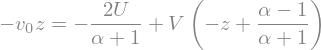

In [3]:
eq1 = Eq( -z*v0, ( (alpha-1)/(alpha+1) - z ) * V - 2/(alpha+1) * U )
eq1

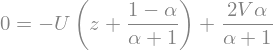

In [4]:
eq2 = Eq( 0, 2*alpha/(alpha+1) * V - ((1-alpha)/(1+alpha) + z) * U )
eq2

In [5]:
sln = solve( [eq1, eq2] , [V, U] )

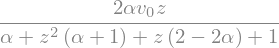

In [6]:
sln[U].simplify().collect(z).collect(alpha)

In [7]:
print(latex(sln[U].simplify().collect(z)))

\frac{2 \alpha v_{0} z}{\alpha + z^{2} \left(\alpha + 1\right) + z \left(2 - 2 \alpha\right) + 1}


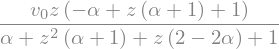

In [8]:
sln[V].simplify().collect(z).collect(alpha)

In [9]:
print(latex(sln[V].simplify().collect(z)))

\frac{v_{0} z \left(- \alpha + z \left(\alpha + 1\right) + 1\right)}{\alpha + z^{2} \left(\alpha + 1\right) + z \left(2 - 2 \alpha\right) + 1}


In [10]:
import lcapy as lp

In [39]:
Vz = sln[V].simplify().collect(z).collect(alpha)
Uz = 2*alpha*v0*lp.z/( z**2 + 2*z*(1-alpha)/(1+alpha) + 1)
Uz

      2⋅\alpha⋅v₀⋅z      
─────────────────────────
 2   2⋅z⋅(1 - \alpha)    
z  + ──────────────── + 1
        \alpha + 1       

In [45]:
Uz(n).rewrite(sin)

            ⎛                            n                                    
            ⎜⎛             _________    ⎞                  ⎛             _____
            ⎜⎜\alpha - 2⋅╲╱ -\alpha  - 1⎟                  ⎜\alpha + 2⋅╲╱ -\al
            ⎜⎜──────────────────────────⎟ ⋅(-\alpha - 1)   ⎜──────────────────
            ⎜⎝        \alpha + 1        ⎠                  ⎝        \alpha + 1
2⋅\alpha⋅v₀⋅⎜─────────────────────────────────────────── + ───────────────────
            ⎜                   _________                                    _
            ⎝               4⋅╲╱ -\alpha                                 4⋅╲╱ 

         n             ⎞           
____    ⎞              ⎟           
pha  - 1⎟              ⎟           
────────⎟ ⋅(\alpha + 1)⎟           
        ⎠              ⎟           
───────────────────────⎟  for n ≥ 0
________               ⎟           
-\alpha                ⎠           